**ASSIGNMENT-5**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

CNN = Sequential(name="Sequential_CNN")

CNN.add(Conv2D(16, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu", input_shape=(28, 28, 1)))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

# Add another pair of Conv2D and MaxPooling2D for more model depth,
# followed by the flatten and multiple dense layers

CNN.add(Conv2D(32, kernel_size=(3, 3),
               strides=(2, 2), padding="same",
               activation="relu"))

CNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),
                     padding="valid"))

CNN.add(Flatten())

CNN.add(Dense(64, activation='relu'))
CNN.add(Dense(32, activation='relu'))
CNN.add(Dense(10, activation='softmax'))

CNN.summary()

Model: "Sequential_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)             

In [29]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [30]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

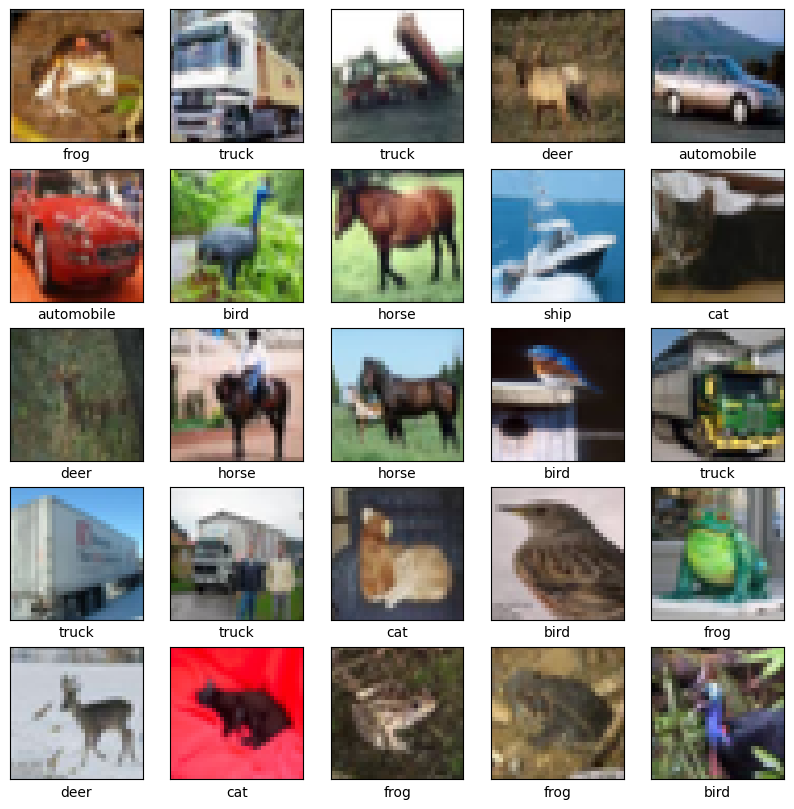

In [31]:
import matplotlib.pyplot as plt
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [32]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [34]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0

In [35]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 86s 54ms/step - loss: 1.5295 - accuracy: 0.4435 - val_loss: 1.2452 - val_accuracy: 0.5577
Epoch 2/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1656 - accuracy: 0.5877 - val_loss: 1.1364 - val_accuracy: 0.5974
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0205 - accuracy: 0.6388 - val_loss: 1.0241 - val_accuracy: 0.6403
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9252 - accuracy: 0.6741 - val_loss: 0.9374 - val_accuracy: 0.6713
Epoch 5/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8606 - accuracy: 0.6981 - val_loss: 0.9076 - val_accuracy: 0.6835
Epoch 6/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.8041 - accuracy: 0.7165 - val_loss: 0.8651 - val_accuracy: 0.6998
Epoch 7/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.7538 - accuracy: 0.7347 - val_loss: 0.8464 -

**ASSIGNMENT-6**

In [36]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the CSV dataset
data = pd.read_csv("/content/connsumerComplaintsSmall.csv")


In [ ]:
data.head()

Unnamed: 0 Date received  \
0           1    21-11-2022   
1           2    21-11-2022   
2           3    21-11-2022   
3           4    21-11-2022   
4           5    15-11-2022   

                                             Product  \
0                                           Mortgage   
1  Credit reporting, credit repair services, or o...   
2  Credit reporting, credit repair services, or o...   
3  Credit reporting, credit repair services, or o...   
4  Credit reporting, credit repair services, or o...   

                  Sub-product  \
0  Conventional home mortgage   
1            Credit reporting   
2            Credit reporting   
3            Credit reporting   
4            Credit reporting   

                                               Issue  \
0                         Struggling to pay mortgage   
1                        Improper use of your report   
2                        Improper use of your report   
3  Problem with a credit reporting company's inve...   
4               Incorrect information on your report   

                                           Sub-issue  \
0                                                NaN   
1      Reporting company used your report improperly   
2      Reporting company used your report improperly   
3  Their investigation did not fix an error on yo...   
4                Information belongs to someone else   

  Consumer complaint narrative  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    101 non-null    int64 
 1   Date received                 101 non-null    object
 2   Product                       101 non-null    object
 3   Sub-product                   101 non-null    object
 4   Issue                         101 non-null    object
 5   Sub-issue                     96 non-null     object
 6   Consumer complaint narrative  3 non-null      object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [ ]:
data.describe()

Unnamed: 0
count  101.000000
mean    51.000000
std     29.300171
min      1.000000
25%     26.000000
50%     51.000000
75%     76.000000
max    101.000000

In [ ]:
data.columns

Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative'],
      dtype='object')

In [ ]:
data.shape

(101, 7)

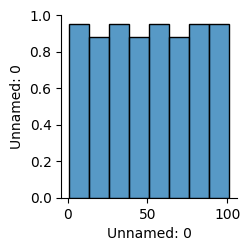

In [ ]:
sns.pairplot(data)

In [ ]:
texts = data['Consumer complaint narrative'].astype(str)
labels = data['Product']
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
vocab_size = 10000


tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')

In [ ]:
# Create a label encoder and fit it to all labels
label_encoder = LabelEncoder()
all_labels = np.concatenate((y_train, y_test))
label_encoder.fit(all_labels)

# Encode both training and testing labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

1/1 [==============================] - 2s 2s/step - loss: 2.0799 - accuracy: 0.0000e+00
Test accuracy: 0.0


**ASSIGNMENT-7**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_data = pd.read_csv('/content/emotion-labels-train.csv')
test_data = pd.read_csv('/content/emotion-labels-test (1).csv')

X_train = train_data['text']
y_train = train_data['label']
X_test = test_data['text']
y_test = test_data['label']


tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_seq_length = 200
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length, padding='post', truncating='post')




In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_seq_length),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
57/57 [==============================] - 17s 261ms/step - loss: 1.3905 - accuracy: 0.2859 - val_loss: 1.4087 - val_accuracy: 0.2941
Epoch 2/10
57/57 [==============================] - 15s 256ms/step - loss: 1.3907 - accuracy: 0.2887 - val_loss: 1.3933 - val_accuracy: 0.2712
Epoch 3/10
57/57 [==============================] - 14s 251ms/step - loss: 1.3881 - accuracy: 0.3031 - val_loss: 1.4025 - val_accuracy: 0.3167
Epoch 4/10
57/57 [==============================] - 14s 248ms/step - loss: 1.3852 - accuracy: 0.3089 - val_loss: 1.4077 - val_accuracy: 0.2829
Epoch 5/10
57/57 [==============================] - 17s 299ms/step - loss: 1.3871 - accuracy: 0.2950 - val_loss: 1.3806 - val_accuracy: 0.2829
Epoch 6/10
57/57 [==============================] - 15s 257ms/step - loss: 1.3879 - accuracy: 0.2962 - val_loss: 1.3857 - val_accuracy: 0.3167
Epoch 7/10
57/57 [==============================] - 14s 253ms/step - loss: 1.3851 - accuracy: 0.3017 - val_loss: 1.3809 - val_accuracy: 0.3167

In [ ]:
test_loss, test_acc = model.evaluate(X_test_pad, y_test_encoded)
print("Test accuracy:", test_acc)

99/99 [==============================] - 3s 34ms/step - loss: 1.3993 - accuracy: 0.2804
Test accuracy: 0.28039464354515076


In [ ]:
example_text = ["I am feeling happy today."]
example_seq = tokenizer.texts_to_sequences(example_text)
example_pad = pad_sequences(example_seq, maxlen=max_seq_length, padding='post', truncating='post')
predicted_class = np.argmax(model.predict(example_pad), axis=-1)
predicted_emotion = label_encoder.inverse_transform(predicted_class)[0]

print("Predicted Emotion:", predicted_emotion)

1/1 [==============================] - 1s 730ms/step
Predicted Emotion: fear
